In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
data = pd.read_csv("bitcoin.csv", parse_dates=["Date"], index_col="Date")
data

,Open,High,Low,Close,Volume
Date,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...
2021-10-07 05:00:00,55073.20,55073.21,54545.07,54735.76,2251.122020
2021-10-07 06:00:00,54735.77,54968.06,54375.83,54534.16,1783.004260
2021-10-07 07:00:00,54534.16,54793.26,54235.33,54755.92,4163.431360


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36168 entries, 2017-08-17 04:00:00 to 2021-10-07 09:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    36168 non-null  float64
 1   High    36168 non-null  float64
 2   Low     36168 non-null  float64
 3   Close   36168 non-null  float64
 4   Volume  36168 non-null  float64
dtypes: float64(5)
memory usage: 1.7 MB


In [6]:
data.Close / data.Close.shift(1) - 1

Date
2017-08-17 04:00:00         NaN
2017-08-17 05:00:00    0.001506
2017-08-17 06:00:00    0.002093
2017-08-17 07:00:00    0.005929
2017-08-17 08:00:00    0.002460
                         ...   
2021-10-07 05:00:00   -0.006127
2021-10-07 06:00:00   -0.003683
2021-10-07 07:00:00    0.004066
2021-10-07 08:00:00   -0.003974
2021-10-07 09:00:00   -0.009953
Name: Close, Length: 36168, dtype: float64

In [4]:
data["returns"] = np.log(data.Close / data.Close.shift(1))
data

,Open,High,Low,Close,Volume,returns
Date,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,NaN
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,0.001505
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,0.002090
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,0.005912
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,0.002457
...,...,...,...,...,...,...
2021-10-07 05:00:00,55073.20,55073.21,54545.07,54735.76,2251.122020,-0.006146
2021-10-07 06:00:00,54735.77,54968.06,54375.83,54534.16,1783.004260,-0.003690
2021-10-07 07:00:00,54534.16,54793.26,54235.33,54755.92,4163.431360,0.004058


**세가지 전략 파라미터**
* 수익률 임계값: 모든 90 백분위수 이상의 값은 매우 높은 수익률로 분류
* 5와 20 백분위 수 사이의 거래량 변동은 적절하거나 높은 감소로 분류

**전략 파라미터: 90, 5, 20**

In [7]:
data

,Open,High,Low,Close,Volume,returns
Date,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,NaN
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,0.001505
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,0.002090
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,0.005912
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,0.002457
...,...,...,...,...,...,...
2021-10-07 05:00:00,55073.20,55073.21,54545.07,54735.76,2251.122020,-0.006146
2021-10-07 06:00:00,54735.77,54968.06,54375.83,54534.16,1783.004260,-0.003690
2021-10-07 07:00:00,54534.16,54793.26,54235.33,54755.92,4163.431360,0.004058


In [8]:
def backtest(data, parameters, tc):
    # 필요한 값들 준비
    data = data[["Close", "Volume", "returns"]].copy()
    data["vol_ch"] = np.log(data.Volume.div(data.Volume.shift(1)))
    data.loc[data.vol_ch > 3, "vol_ch"] = np.nan
    data.loc[data.vol_ch < -3, "vol_ch"] = np.nan
    
    # 거래 포지션 정의
    return_thresh = np.percentile(data.returns.dropna(), parameters[0])
    cond1 = data.returns >= return_thresh
    volume_thresh = np.percentile(data.vol_ch.dropna(), [parameters[1], parameters[2]])
    cond2 = data.vol_ch.between(volume_thresh[0], volume_thresh[1])
    
    data["position"] = 1
    data.loc[cond1 & cond2, "position"] = 0
    
    # 백테스트
    data["strategy"] = data.position.shift(1) * data["returns"]
    data["trades"] = data.position.diff().fillna(0).abs()
    data.strategy = data.strategy + data.trades * tc
    data["creturns"] = data["returns"].cumsum().apply(np.exp)
    data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
    
    return data.cstrategy[-1]

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
backtest(data=data, parameters=(90, 5, 20), tc=-0.00085)

19.056162979544915

In [11]:
return_range = range(85, 98, 1)
vol_low_range = range(2, 16, 1)
vol_high_range = range(16, 35, 1)

In [12]:
list(return_range)

[85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]

**모든 조합으로 백테스트를 하고 최적의 조합을 찾는다**

In [13]:
from itertools import product

In [14]:
combinations = list(product(return_range, vol_low_range, vol_high_range))
combinations

[(85, 2, 16),
 (85, 2, 17),
 (85, 2, 18),
 (85, 2, 19),
 (85, 2, 20),
 (85, 2, 21),
 (85, 2, 22),
 (85, 2, 23),
 (85, 2, 24),
 (85, 2, 25),
 (85, 2, 26),
 (85, 2, 27),
 (85, 2, 28),
 (85, 2, 29),
 (85, 2, 30),
 (85, 2, 31),
 (85, 2, 32),
 (85, 2, 33),
 (85, 2, 34),
 (85, 3, 16),
 (85, 3, 17),
 (85, 3, 18),
 (85, 3, 19),
 (85, 3, 20),
 (85, 3, 21),
 (85, 3, 22),
 (85, 3, 23),
 (85, 3, 24),
 (85, 3, 25),
 (85, 3, 26),
 (85, 3, 27),
 (85, 3, 28),
 (85, 3, 29),
 (85, 3, 30),
 (85, 3, 31),
 (85, 3, 32),
 (85, 3, 33),
 (85, 3, 34),
 (85, 4, 16),
 (85, 4, 17),
 (85, 4, 18),
 (85, 4, 19),
 (85, 4, 20),
 (85, 4, 21),
 (85, 4, 22),
 (85, 4, 23),
 (85, 4, 24),
 (85, 4, 25),
 (85, 4, 26),
 (85, 4, 27),
 (85, 4, 28),
 (85, 4, 29),
 (85, 4, 30),
 (85, 4, 31),
 (85, 4, 32),
 (85, 4, 33),
 (85, 4, 34),
 (85, 5, 16),
 (85, 5, 17),
 (85, 5, 18),
 (85, 5, 19),
 (85, 5, 20),
 (85, 5, 21),
 (85, 5, 22),
 (85, 5, 23),
 (85, 5, 24),
 (85, 5, 25),
 (85, 5, 26),
 (85, 5, 27),
 (85, 5, 28),
 (85, 5, 29),
 (85, 

In [15]:
len(combinations)

3458

In [16]:
13 * 14 * 19

3458

In [17]:
results = []
for comb in combinations:
    results.append(backtest(data=data, parameters=comb, tc=-0.00085))

In [18]:
many_results = pd.DataFrame(data=combinations, columns=["returns", "vol_low", "vol_high"])
many_results["performance"] = results
many_results

,returns,vol_low,vol_high,performance
0,85,2,16,16.531128
1,85,2,17,17.042182
2,85,2,18,18.613172
3,85,2,19,18.607122
4,85,2,20,17.445944
...,...,...,...,...
3453,97,15,30,13.129257
3454,97,15,31,14.376261
3455,97,15,32,13.286913
3456,97,15,33,12.649590


In [19]:
many_results.nlargest(20, "performance")

,returns,vol_low,vol_high,performance
2595,94,12,27,30.049242
2596,94,12,28,29.118324
2329,93,12,27,28.758840
2576,94,11,27,28.607623
2599,94,12,31,28.347644
2865,95,12,31,28.250187
2291,93,10,27,28.126993
2310,93,11,27,28.089283
2861,95,12,27,28.025133
2063,92,12,27,28.011543


In [20]:
many_results.nsmallest(20, "performance")

,returns,vol_low,vol_high,performance
265,85,15,34,8.919101
264,85,15,33,9.454071
261,85,15,30,9.635953
263,85,15,32,9.698984
531,86,15,34,10.086398
1595,90,15,34,10.357921
18,85,2,34,10.499415
37,85,3,34,10.515405
75,85,5,34,10.646851
797,87,15,34,10.731116


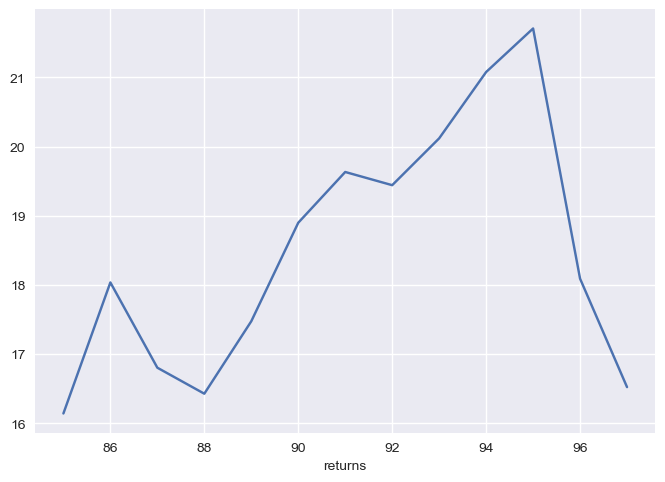

In [21]:
many_results.groupby("returns").performance.mean().plot()
plt.show()

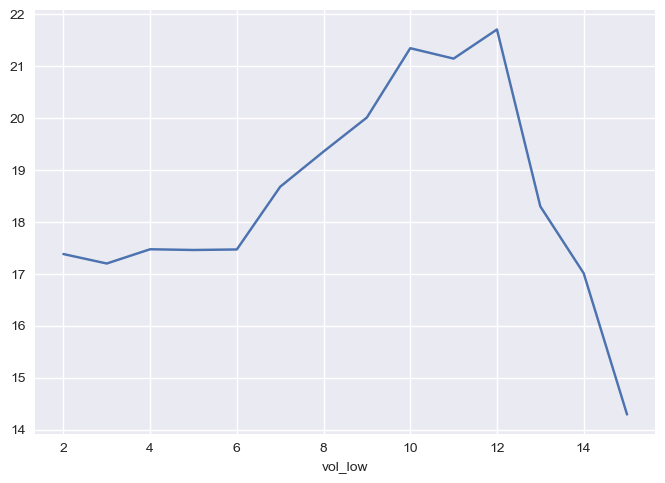

In [22]:
many_results.groupby("vol_low").performance.mean().plot()
plt.show()

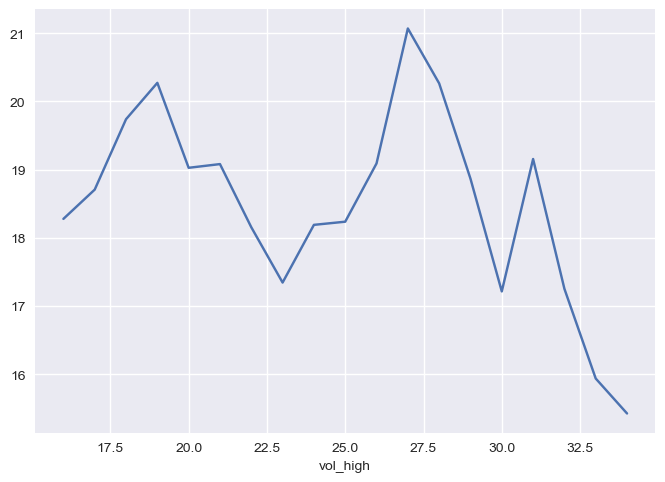

In [23]:
many_results.groupby("vol_high").performance.mean().plot()
plt.show()

In [24]:
backtest(data=data, parameters=(94, 11, 27), tc=-0.00085)

28.607622816622424

In [25]:
backtest(data=data, parameters=(90, 5, 20), tc=-0.00085)

19.056162979544915